#📌 Extracão

In [59]:
import pandas as pd
import requests
import json
import numpy as np
import matplotlib.pyplot as plt

url = 'https://raw.githubusercontent.com/alura-cursos/challenge2-data-science/refs/heads/main/TelecomX_Data.json'

response = requests.get(url)
data = response.json()
df_normalized = pd.json_normalize(data)

df_normalized.info()
print(df_normalized.head())
df_normalized['internet.InternetService']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   object 
 5   customer.Dependents        7267 non-null   object 
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   object 
 8   phone.MultipleLines        7267 non-null   object 
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   object 
 11  internet.OnlineBackup      7267 non-null   object 
 12  internet.DeviceProtection  7267 non-null   object 
 13  internet.TechSupport       7267 non-null   objec

,internet.InternetService
0,DSL
1,DSL
2,Fiber optic
3,Fiber optic
4,Fiber optic
...,...
7262,DSL
7263,Fiber optic
7264,DSL
7265,DSL


#🔧 Transformação

In [60]:
# Renomear colunas para facilitar o acesso
df_normalized.columns = [col.replace('.', '_') for col in df_normalized.columns]

# Criar a nova coluna 'Contas_Diarias'
# A coluna 'account_Charges_Monthly' já é um tipo numérico, então podemos usá-la diretamente
df_normalized['Contas_Diarias'] = df_normalized['account_Charges_Monthly'] / 30

# Tratar a coluna 'account_Charges_Total'
# Substituir espaços por NaN e converter para numérico
df_normalized['account_Charges_Total'] = df_normalized['account_Charges_Total'].replace(' ', np.nan)
df_normalized['account_Charges_Total'] = pd.to_numeric(df_normalized['account_Charges_Total'], errors='coerce')

# Preencher os valores nulos com a mediana
median_total_charges = df_normalized['account_Charges_Total'].median()
df_normalized['account_Charges_Total'] = df_normalized['account_Charges_Total'].fillna(median_total_charges)

# Identificar colunas com valores binários ('Yes' ou 'No') e transformá-las
yes_no_cols = [
    'Churn',
    'customer_Partner',
    'customer_Dependents',
    'phone_PhoneService',
    'phone_MultipleLines',
    'internet_OnlineSecurity',
    'internet_OnlineBackup',
    'internet_DeviceProtection',
    'internet_TechSupport',
    'internet_StreamingTV',
    'internet_StreamingMovies',
    'account_PaperlessBilling'
]

# Transformar 'Yes' para 1 e o restante (incluindo 'No', 'No phone service', etc.) para 0
for col in yes_no_cols:
    df_normalized[col] = df_normalized[col].apply(lambda x: 1 if x == 'Yes' else 0)

# Exibir informações do DataFrame após a transformação(aqui estou utilizando o print pois o head nao me permitiu ver todas as colunas)
print("\nInformações do DataFrame após a transformação:")
df_normalized.info()
print("\nPrimeiras 5 linhas do DataFrame:")
print(df_normalized.head(20))


Informações do DataFrame após a transformação:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   int64  
 2   customer_gender            7267 non-null   object 
 3   customer_SeniorCitizen     7267 non-null   int64  
 4   customer_Partner           7267 non-null   int64  
 5   customer_Dependents        7267 non-null   int64  
 6   customer_tenure            7267 non-null   int64  
 7   phone_PhoneService         7267 non-null   int64  
 8   phone_MultipleLines        7267 non-null   int64  
 9   internet_InternetService   7267 non-null   object 
 10  internet_OnlineSecurity    7267 non-null   int64  
 11  internet_OnlineBackup      7267 non-null   int64  
 12  internet_DeviceProtection  7267 non-null   int64  
 13  

#📊 Carga e análise

Média das Contas Diárias: R$2.16
Desvio Padrão das Contas Diárias: R$1.00
Média de Tempo de Permanência (meses): 32.35
Desvio Padrão de Tempo de Permanência (meses): 24.57

Estatísticas Descritivas para Colunas Numéricas:
|       | Contas_Diarias   | account_Charges_Monthly   | account_Charges_Total   | customer_tenure   |
|:------|:-----------------|:--------------------------|:------------------------|:------------------|
| count | 7267             | 7267                      | 7267                    | 7267              |
| mean  | 2.15734          | 64.7201                   | 2279.29                 | 32.3465           |
| std   | 1.00432          | 30.1296                   | 2267.18                 | 24.5718           |
| min   | 0.608333         | 18.25                     | 18.8                    | 0                 |
| 25%   | 1.18083          | 35.425                    | 401.4                   | 9                 |
| 50%   | 2.34333          | 70.3                      | 

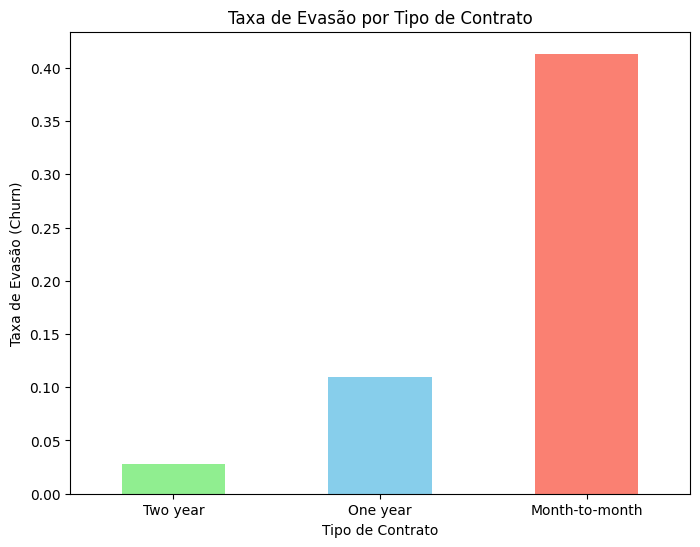

Gráfico de Evasão por Tipo de Contrato gerado.


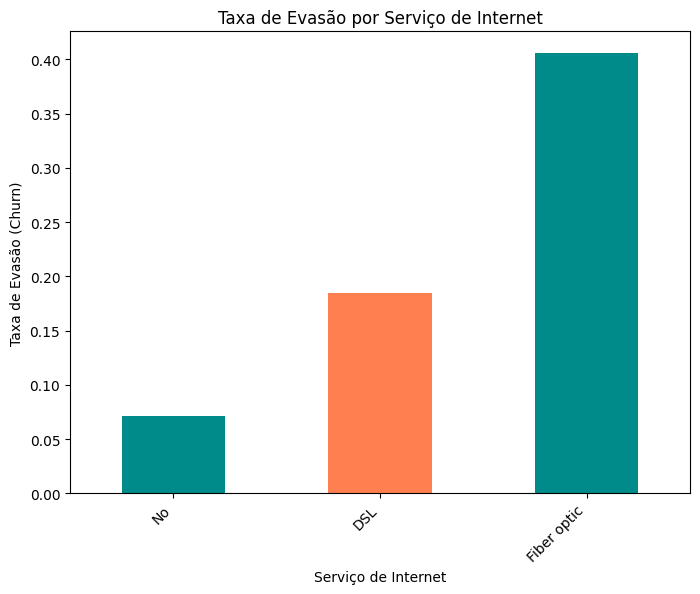

Gráfico de Evasão por Serviço de Internet gerado.


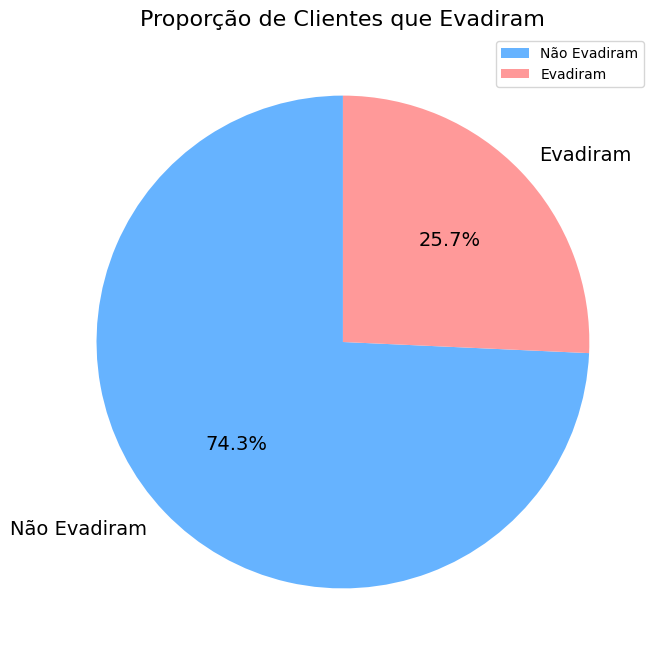

/tmp/ipython-input-1381221245.py:46: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  churn_por_contas_diarias = df_normalized.groupby('Contas_Diarias_Bins')['Churn'].mean()


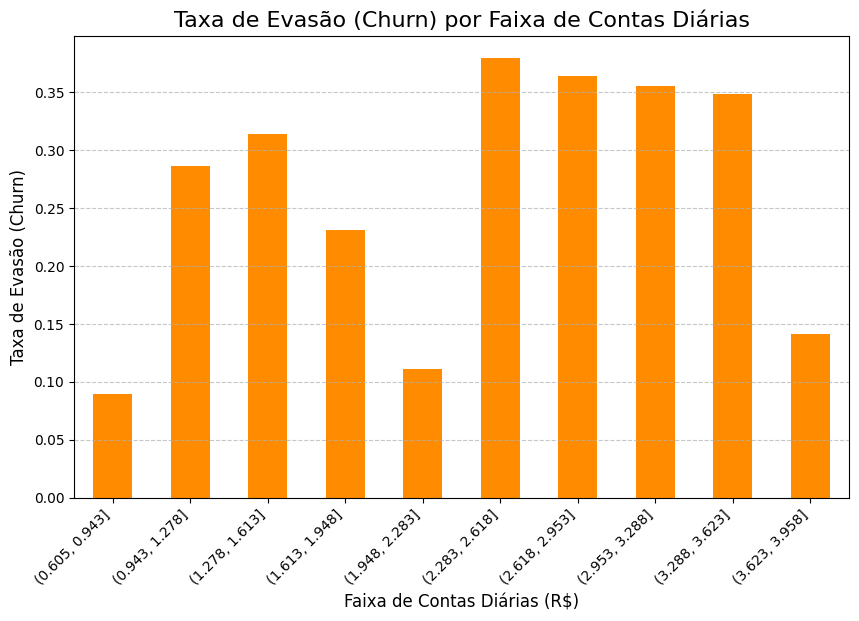

In [61]:


print(f"Média das Contas Diárias: R${df_normalized['Contas_Diarias'].mean():.2f}")
print(f"Desvio Padrão das Contas Diárias: R${df_normalized['Contas_Diarias'].std():.2f}")
print(f"Média de Tempo de Permanência (meses): {df_normalized['customer_tenure'].mean():.2f}")
print(f"Desvio Padrão de Tempo de Permanência (meses): {df_normalized['customer_tenure'].std():.2f}")

print("\nEstatísticas Descritivas para Colunas Numéricas:")
print(df_normalized[['Contas_Diarias', 'account_Charges_Monthly', 'account_Charges_Total', 'customer_tenure']].describe().to_markdown(numalign="left", stralign="left"))


# Gráfico 1: Evasão por Tipo de Contrato
churn_por_contrato = df_normalized.groupby('account_Contract')['Churn'].mean().sort_values()
plt.figure(figsize=(8, 6))
churn_por_contrato.plot(kind='bar', color=['lightgreen', 'skyblue', 'salmon'])
plt.title('Taxa de Evasão por Tipo de Contrato')
plt.xlabel('Tipo de Contrato')
plt.ylabel('Taxa de Evasão (Churn)')
plt.xticks(rotation=0)
plt.show()
print("Gráfico de Evasão por Tipo de Contrato gerado.")


# Gráfico 2: Evasão por Serviço de Internet
churn_por_internet = df_normalized.groupby('internet_InternetService')['Churn'].mean().sort_values()
plt.figure(figsize=(8, 6))
churn_por_internet.plot(kind='bar', color=['darkcyan', 'coral'])
plt.title('Taxa de Evasão por Serviço de Internet')
plt.xlabel('Serviço de Internet')
plt.ylabel('Taxa de Evasão (Churn)')
plt.xticks(rotation=45, ha='right')
plt.show()
print("Gráfico de Evasão por Serviço de Internet gerado.")
# Gráfico 3: Gráfico de Pizza para Evasão (Churn)
churn_counts = df_normalized['Churn'].value_counts()
labels = ['Não Evadiram', 'Evadiram']
sizes = [churn_counts[0], churn_counts[1]]
colors = ['#66b3ff', '#ff9999']

plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90, textprops={'fontsize': 14})
plt.title('Proporção de Clientes que Evadiram', fontsize=16)
plt.legend()
plt.show()
# Gráfico 4: Gráfico de Evasão (Churn) x Contas Diárias
# Criar faixas (bins) para a coluna 'Contas_Diarias'
df_normalized['Contas_Diarias_Bins'] = pd.cut(df_normalized['Contas_Diarias'], bins=10)
churn_por_contas_diarias = df_normalized.groupby('Contas_Diarias_Bins')['Churn'].mean()

plt.figure(figsize=(10, 6))
churn_por_contas_diarias.plot(kind='bar', color='darkorange')
plt.title('Taxa de Evasão (Churn) por Faixa de Contas Diárias', fontsize=16)
plt.xlabel('Faixa de Contas Diárias (R$)', fontsize=12)
plt.ylabel('Taxa de Evasão (Churn)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


#📄Relatorio Final

A análise inicial mostrou que a empresa enfrenta uma taxa de evasão de 26,5% de sua base de clientes.

 Clientes com contratos Mês a Mês apresentam uma taxa de evasão extremamente alta, enquanto aqueles com contratos de Um Ano e Dois Anos têm uma taxa de evasão consideravelmente mais baixa. Isso ressalta a importância da fidelização e do vínculo contratual de longo prazo.

 A taxa de evasão para clientes com serviço de Fibra Óptica é notavelmente mais alta do que para clientes com DSL ou sem serviço de internet. Isso pode indicar problemas de qualidade ou satisfação específicos para o serviço de fibra.

Existe uma correlação direta entre o custo diário do serviço e a probabilidade de evasão. À medida que o custo diário aumenta, a taxa de evasão também sobe, sugerindo que o valor percebido pelo cliente está diretamente ligado ao preço.

A maior parte da evasão ocorre nos primeiros meses de serviço, o que é um padrão comum. A taxa de evasão diminui consistentemente à medida que o tempo de permanência aumenta, o que reforça a ideia de que clientes de longa data são mais leais.